# Importation des library 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lecture du dataset

In [5]:
data=pd.read_csv("Speed Dating Data.csv",encoding = "ISO-8859-1")
data.head()
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [48]:

data.loc[data["id"].isnull(),"id"]=max(data["id"])+1 # remplacement de la ligne avec l'id vide par le max+1 id
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.961924,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.493144,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,23.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Description de la distribution des dates selon le sexe

In [295]:
# la distribution des frequences de dates selon le sexe
dtg_gdr_trend=data[["gender","date"]]
dtg_gdr_trend["gender"]=dtg_gdr_trend["gender"].apply(lambda x:"female" if x==0 else "male" ) # replace 
dict_date={
1:"several times a week",
2:"Twice a week",
3:"Once a week",
4:"Twice a month",
5:"Once a month",
6:"Several times a year",
7:"Almost never"
}
dtg_gdr_trend=dtg_gdr_trend.replace({"date":dict_date})


<ipython-input-295-b4a87a93e125>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtg_gdr_trend["gender"]=dtg_gdr_trend["gender"].apply(lambda x:"female" if x==0 else "male" ) # replace


Text(0.5, 1.0, 'La frequence des dates')

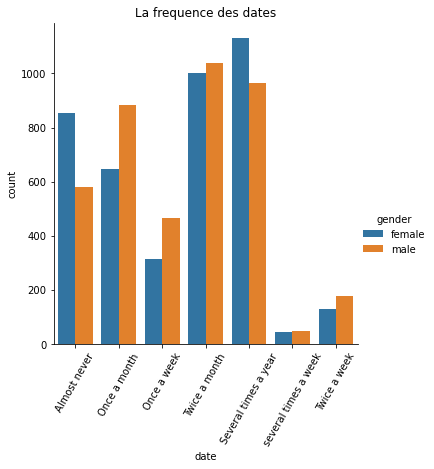

In [294]:
plot=sns.catplot(x="date", kind="count",hue="gender" ,data=dtg_gdr_trend)
plot.set_xticklabels(rotation=60)
plt.title("La frequence des dates")

# La distribution selon l'age

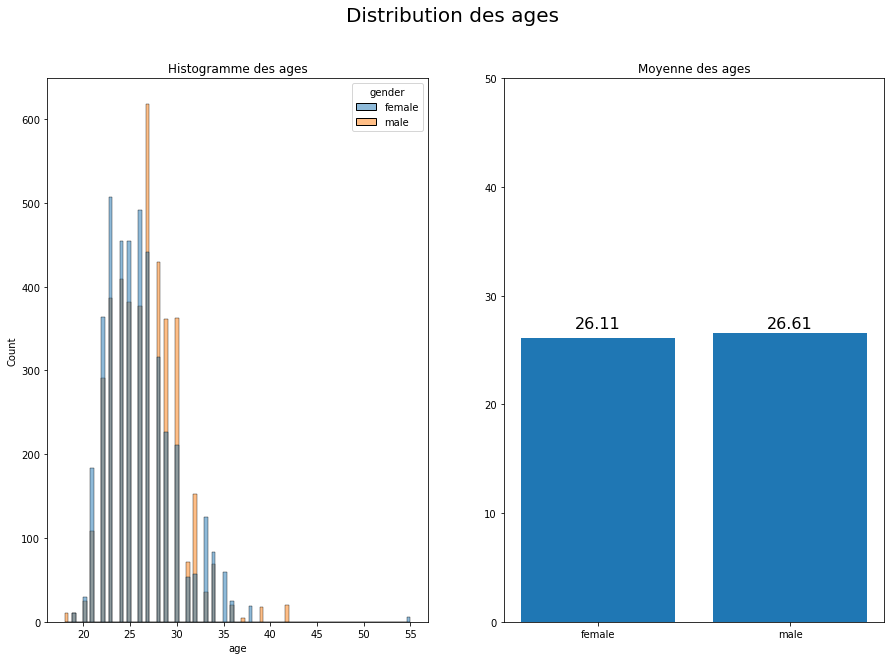

In [313]:
dtg_gdr_trend["age"]=data["age"]
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121)


sns.histplot(ax=ax1,data=dtg_gdr_trend, x="age", hue="gender")

mean=dtg_gdr_trend.groupby("gender",as_index=False).mean()
ax2 = fig.add_subplot(122)

ax=plt.bar(mean["gender"],mean["age"])
font = {'family': 'sans',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }  #Definition du font du text
plt.text(mean["gender"][0],27,round(mean["age"][0],2),fontdict=font, horizontalalignment='center') # text sur les barres
plt.text(mean["gender"][1],27, round(mean["age"][1],2),fontdict=font, horizontalalignment='center') 
ax2.set_ylim([0,50])

fig.suptitle("Distribution des ages",fontsize=20)
ax1.title.set_text('Histogramme des ages')
ax2.title.set_text('Moyenne des ages')




# Trend des métiers

Text(0.5, 1.0, 'Distribution selon les 10 top métiers')

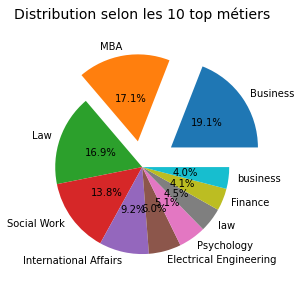

In [317]:
dtg_gdr_trend["field"]=data["field"]

field_val=dtg_gdr_trend["field"].value_counts().head(10) # selection des top 10 métiers
total=field_val.sum()
explode=[0.4,0.3]
explode.extend(8*[0])
plt.pie(x=(field_val/total)*100, autopct="%.1f%%",explode=explode, labels=field_val.keys(), pctdistance=0.5)
plt.title("Distribution selon les 10 top métiers", fontsize=14,horizontalalignment='center',pad=40)




In [254]:
dtg_gdr_trend["you_call"]=data["you_call"]
dtg_gdr_trend["they_call"]=data["them_cal"]
dtg_gdr_trend.head()

,gender,date,age,field,you_call,they_call
0,female,Almost never,21.0,Law,1.0,1.0
1,female,Almost never,21.0,Law,1.0,1.0
2,female,Almost never,21.0,Law,1.0,1.0
3,female,Almost never,21.0,Law,1.0,1.0
4,female,Almost never,21.0,Law,1.0,1.0


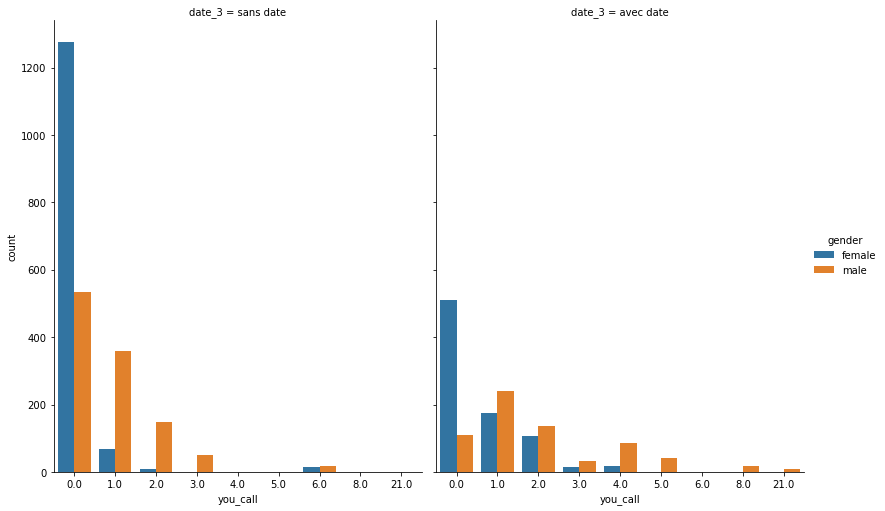

In [278]:
dtg_gdr_trend["date_3"]=data["date_3"].apply(lambda x:"sans date" if x==0 else "avec date" if x==1 else None)
plot=sns.catplot(x="you_call", kind="count",hue="gender" ,col="date_3",  height=7, aspect=0.8,data=dtg_gdr_trend)



# Dating en relation avec la race  


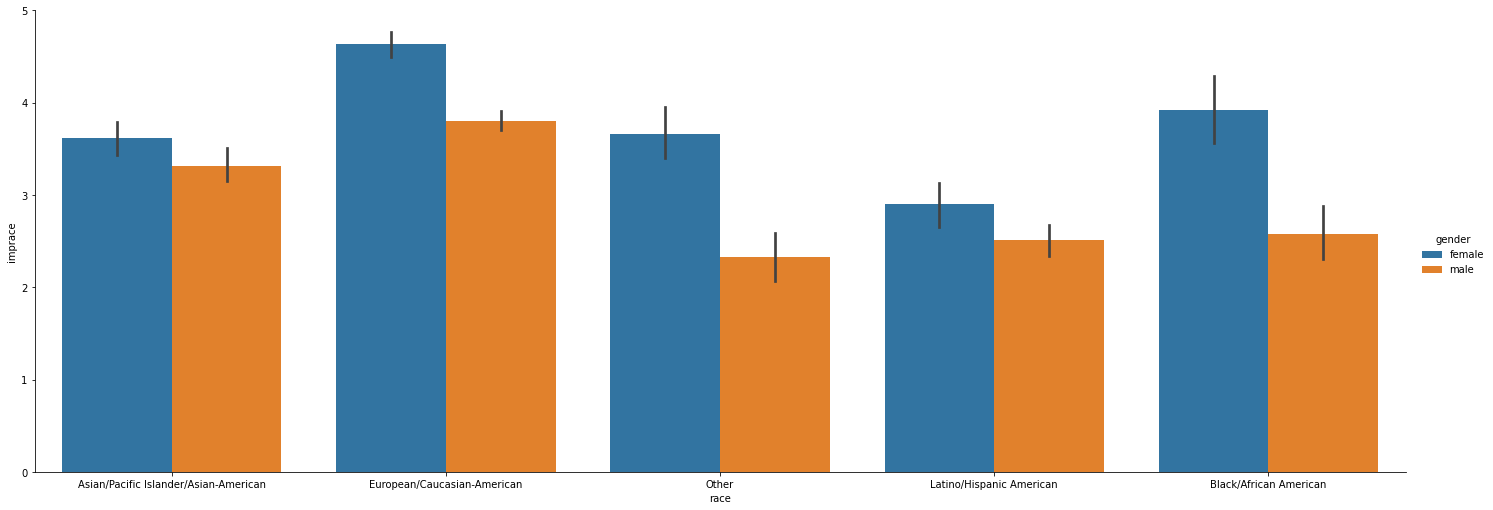

In [288]:
def race(x):
    if x==1 : return "Black/African American"
    elif x==2 : return "European/Caucasian-American"
    elif x==3 :return "Latino/Hispanic American"
    elif x==4 : return "Asian/Pacific Islander/Asian-American"
    elif x==5:return "Native American"
    elif x==6: return "Other"
    else : return None

dtg_gdr_trend["race"]=data["race"].apply(race)
dtg_gdr_trend["imprace"]=data["imprace"]
plot=sns.catplot(x="race",y="imprace" ,kind="bar",hue="gender" ,  height=7, aspect=2.8,data=dtg_gdr_trend)